1번

In [1]:
import seaborn as sns
Mpg_data = sns.load_dataset("mpg")
Mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


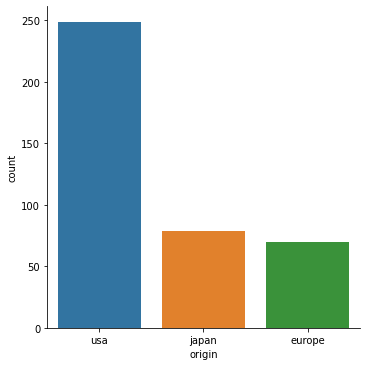

In [2]:
sns.catplot(x= 'origin', data = Mpg_data, kind = 'count')

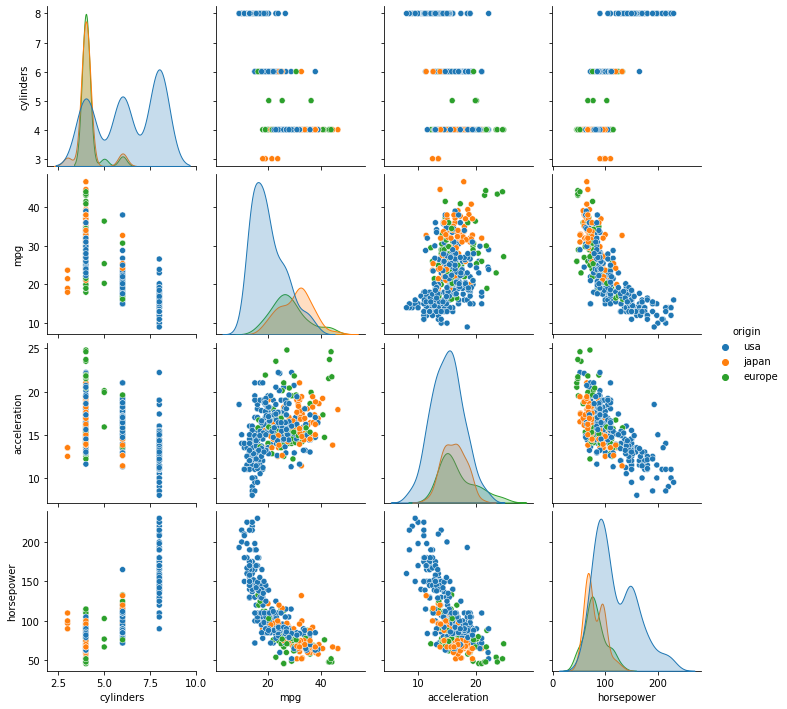

In [3]:
M = Mpg_data[['cylinders', 'mpg', 'acceleration', 'horsepower', 'origin']]
sns.pairplot(M, hue= 'origin')

분석
USA는 모든 값이 상대적으로 큰 것처럼 보인다. 
Japan과 europe의 값들이 굉장히 유사한 것으로 보인다. 

cylinders를 분석해보면 Japan과 europe은 작은값에 많이 몰려있지만
USA는 다양한 것으로 해석이 된다. 

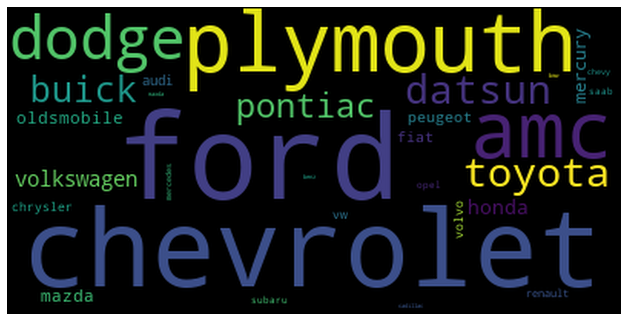

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ""
for i in range(len(Mpg_data)):
    text += Mpg_data['name'][i].split(" ")[0]
    text += " "
    
wordcloud = WordCloud().generate(text)

plt.figure(figsize = (11,11))
plt.imshow(wordcloud, interpolation = 'lanczos')
plt.axis('off')
plt.show()

2번

In [5]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
import pandas as pd
titanic.pivot_table(index=['sex', 'class'])

adult_male        age     alone        fare     parch  pclass  \
sex    class                                                                   
female First     0.000000  34.611765  0.361702  106.125798  0.457447       1   
       Second    0.000000  28.722973  0.421053   21.970121  0.605263       2   
       Third     0.000000  21.750000  0.416667   16.118810  0.798611       3   
male   First     0.975410  41.281386  0.614754   67.226127  0.278689       1   
       Second    0.916667  30.740707  0.666667   19.741782  0.222222       2   
       Third     0.919308  26.507589  0.760807   12.661633  0.224784       3   

                  sibsp  survived  
sex    class                       
female First   0.553191  0.968085  
       Second  0.486842  0.921053  
       Third   0.895833  0.500000  
male   First   0.311475  0.368852  
       Second  0.342593  0.157407  
       Third   0.498559  0.135447

In [7]:
grouped_C = titanic.groupby('class')['fare'].mean()
grouped_C

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [8]:
titanic.pivot_table(index=['sex', 'class'])['age'].max()

41.28138613861386

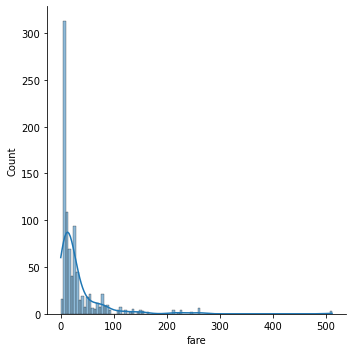

In [9]:
#fare＇를 kernel density estimate 랑 히스토그램을 같이 그림을 그려라.

sns.displot(titanic['fare'], kde = True)

<BarContainer object of 2 artists>

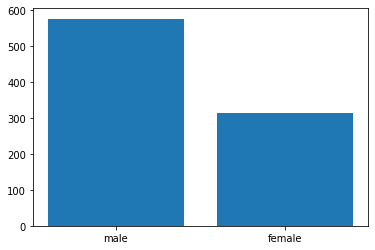

In [10]:
import matplotlib.pyplot as plt
sex = titanic['sex'].value_counts()
plt.bar(sex.index, sex.values)

<BarContainer object of 3 artists>

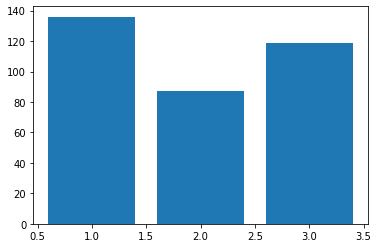

In [11]:
#생존한 사람(‘alive’)의 class(1등급,2등급3등급) 분포를 그림으로 그려라

t = titanic[titanic['alive'] == 'yes']
t = t['pclass'].value_counts()
plt.bar(t.index, t.values)

3번

In [12]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


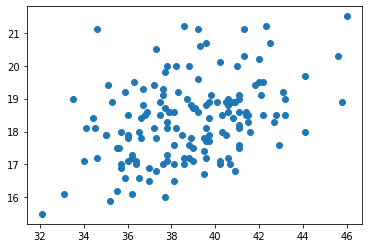

In [13]:
p = penguins[penguins['species'] == 'Adelie']
plt.scatter(x = p["bill_length_mm"], y = p['bill_depth_mm'])

In [14]:
print(p["bill_length_mm"].max())
print(p['bill_length_mm'].min())

print(p["bill_depth_mm"].max())
print(p['bill_depth_mm'].min())

print(p["flipper_length_mm"].max())
print(p['flipper_length_mm'].min())

46.0
32.1
21.5
15.5
210.0
172.0


In [15]:
p_sort = p.sort_values(by='bill_length_mm')
p_sort[p_sort['flipper_length_mm']>190.0]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female
83,Adelie,Torgersen,35.1,19.4,193.0,4200.0,Male
66,Adelie,Biscoe,35.5,16.2,195.0,3350.0,Female
...,...,...,...,...,...,...,...
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,Male
43,Adelie,Dream,44.1,19.7,196.0,4400.0,Male
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,Male
73,Adelie,Torgersen,45.8,18.9,197.0,4150.0,Male
